# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

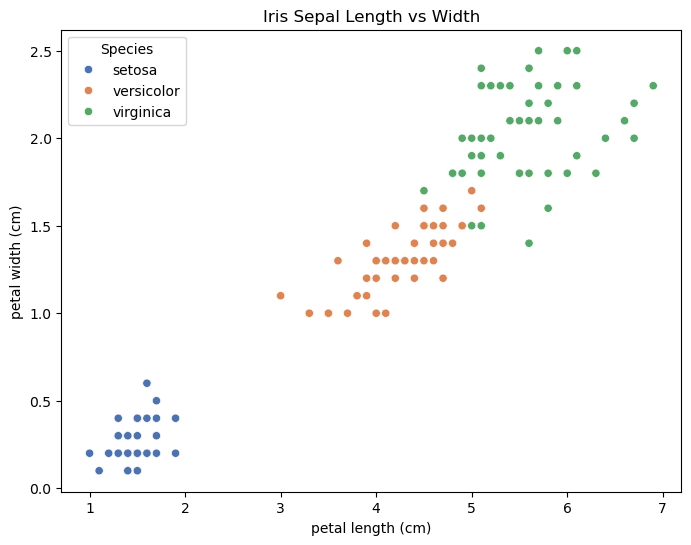

In [76]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_iris['petal length (cm)'], y=df_iris['petal width (cm)'], hue=df_iris['label_names'], palette='deep')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris Sepal Length vs Width')
plt.legend(title='Species')
plt.show()

In [77]:
x=df_iris['petal length (cm)']
y=df_iris['petal width (cm)']

In [78]:
x

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [79]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state =2021)

In [82]:
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (120, 4)
y_train.shape=  (120,)


array([[5.5, 2.4, 3.7, 1. ],
       [6.2, 2.9, 4.3, 1.3],
       [4.9, 3.1, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.6, 2.9, 4.6, 1.3]])

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
n_neighbors =5

knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.9611646884272997

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train_scaled, y_train)
knn_reg.score(X_test_scaled, y_test)

0.9785515578635015

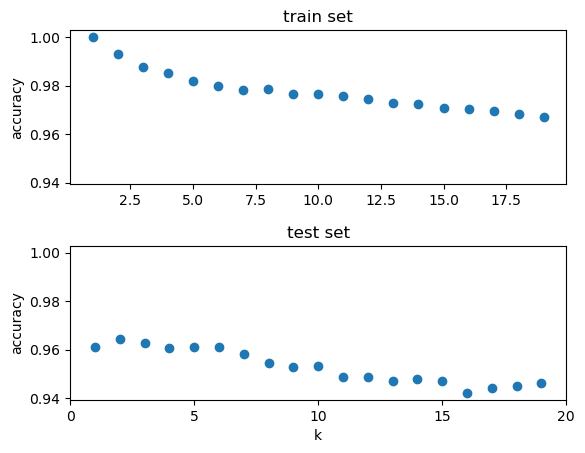

In [86]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks([0,5,10,15,20]);
fig.subplots_adjust(hspace=.4)
ax1.set_title('train set');
ax2.set_title('test set');
plt.show()

In [89]:
# k_best = None 
# score_best = None 
# print ('The best k = {} , score = {}'.format(k_best,score_best ))

k : 5
best score: 0.8536585365853657


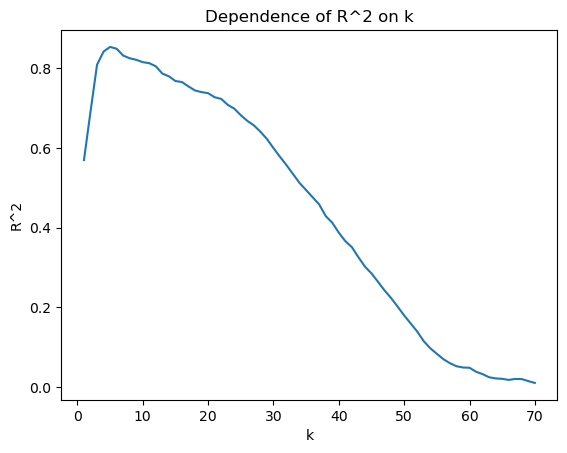

In [319]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_scores = []
k_values = range(1, 71)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

optimal_k = np.argmax(r2_scores) + 1
optimal_r2 = r2_scores[optimal_k - 1]

print(f"k : {optimal_k}")
print(f"best score: {optimal_r2}")

plt.plot(k_values, r2_scores)
plt.xlabel("k")
plt.ylabel("R^2")
plt.title("Dependence of R^2 on k")
plt.show()

## Synthetic dataset  

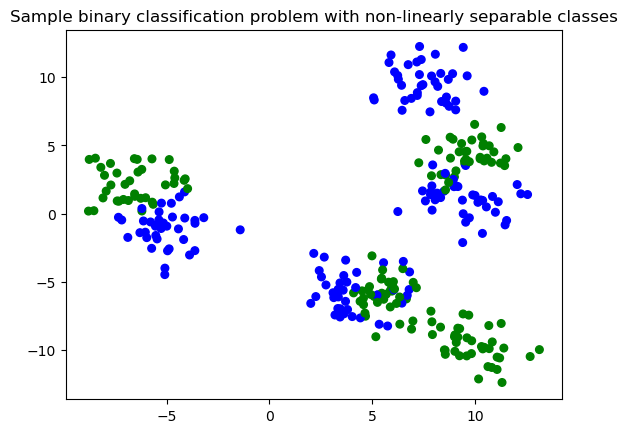

In [110]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

plt.show()

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=777)

In [304]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors =3

knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.808703969392635

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train_scaled, y_train)
print(f"Test score with StandardScaler: {knn_reg.score(X_test_scaled, y_test)}")

Test score with StandardScaler: 0.8146819703491153


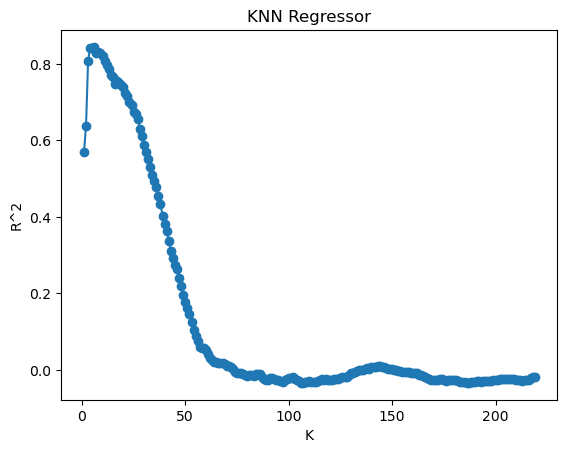

Best K: 6
best score: 0.8445719751315159


In [321]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=777)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 220)
scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)
    
    score = knn_reg.score(X_test_scaled, y_test)
    scores.append(score)

plt.plot(k_values, scores, marker='o')
plt.xlabel('K')
plt.ylabel('R^2')
plt.title('KNN Regressor')
plt.show()

best_k = k_values[np.argmax(scores)]
print(f"Best K: {best_k}")
print(f"best score: {max(scores)}")


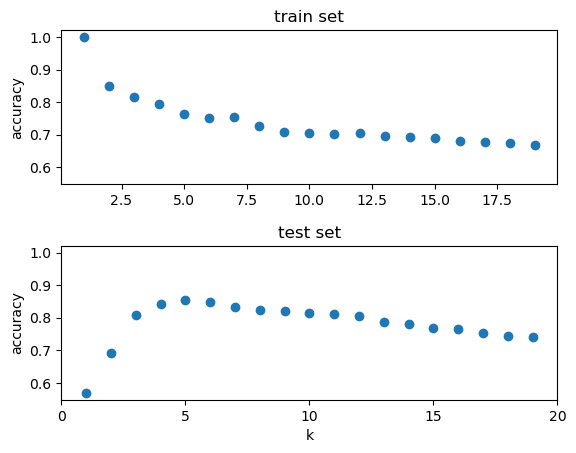

In [328]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks([0,5,10,15,20]);
fig.subplots_adjust(hspace=.4)
ax1.set_title('train set');
ax2.set_title('test set');
plt.show()